In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer, load_iris, load_wine, load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart=pd.read_csv('./heart.csv')
data_sets = [[load_breast_cancer, "breast_cancer"], [load_iris, "iris"], [load_wine, "wine"], [load_digits,"digits"],[heart, "heart_disease"]]
results_dict = {}

In [90]:
for data_set in data_sets:
    if data_set[1] == "heart_disease":
        wn_np = data_set[0].values
        X = wn_np[:, :-1]
        y = wn_np[:, -1]
    else:
        data = data_set[0]()
        X = data.data
        y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    kernel_results = {}
    # List of kernels
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    for kernel in kernels:
        estimator = SVC(probability=True, kernel=kernel)
        ada_boost = AdaBoostClassifier(estimator=estimator, random_state=42)
        ada_boost.fit(X_train, y_train)
        y_pred = ada_boost.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store results in the kernel_results dictionary
        kernel_results[kernel] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        }

    # Store the results for this dataset in the main results dictionary
    results_dict[data_set[1]] = kernel_results

In [91]:
for dataset, kernel_results in results_dict.items():
    print(f'\nDataset: {dataset}')
    for kernel, metrics in kernel_results.items():
        print(f'\nKernel: {kernel}')
        print(f'Accuracy: {metrics["Accuracy"]}')
        print(f'Precision: {metrics["Precision"]}')
        print(f'Recall: {metrics["Recall"]}')
        print(f'F1: {metrics["F1"]}')


Dataset: breast_cancer

Kernel: linear
Accuracy: 0.8771929824561403
Precision: 0.8967304625199362
Recall: 0.8771929824561403
F1: 0.8694744718136531

Kernel: poly
Accuracy: 0.6754385964912281
Precision: 0.783625730994152
Recall: 0.6754385964912281
F1: 0.5682578539371685

Kernel: rbf
Accuracy: 0.9473684210526315
Precision: 0.9497953745122298
Recall: 0.9473684210526315
F1: 0.9464740282077744

Kernel: sigmoid
Accuracy: 0.6710526315789473
Precision: 0.7816851545905122
Recall: 0.6710526315789473
F1: 0.5591781896472591

Dataset: iris

Kernel: linear
Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
Recall: 0.9666666666666667
F1: 0.9666666666666667

Kernel: poly
Accuracy: 0.85
Precision: 0.9
Recall: 0.85
F1: 0.8417241379310345

Kernel: rbf
Accuracy: 0.9833333333333333
Precision: 0.9841666666666666
Recall: 0.9833333333333333
F1: 0.9833089133089132

Kernel: sigmoid
Accuracy: 0.7166666666666667
Precision: 0.772060606060606
Recall: 0.7166666666666667
F1: 0.7133804962080628

Dataset: wine

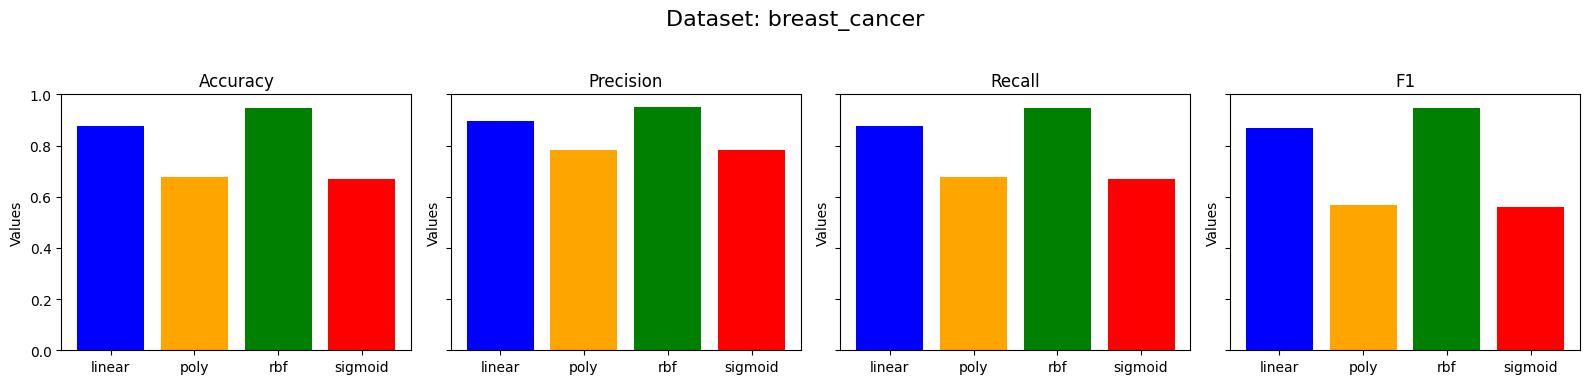

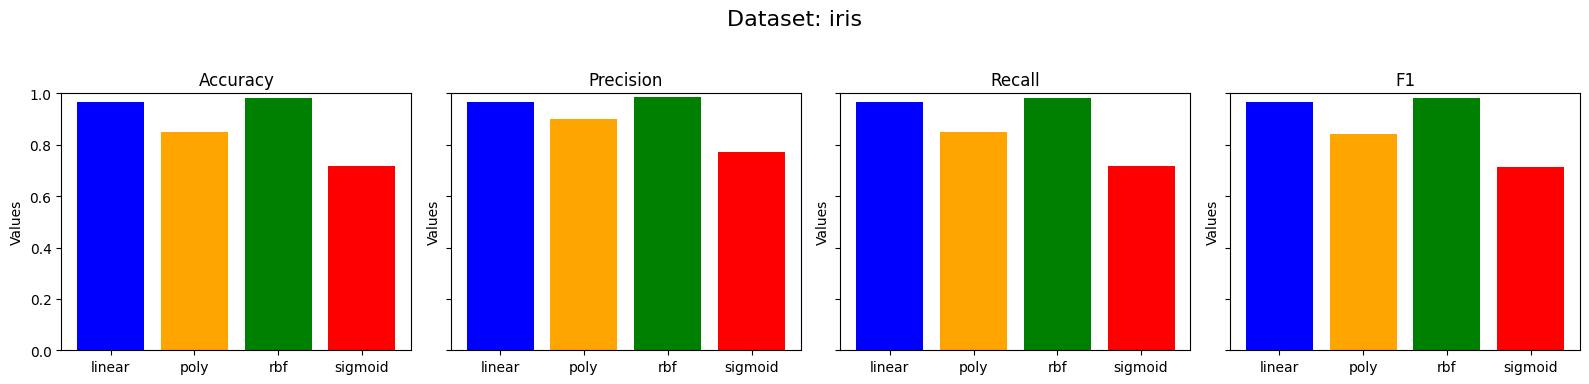

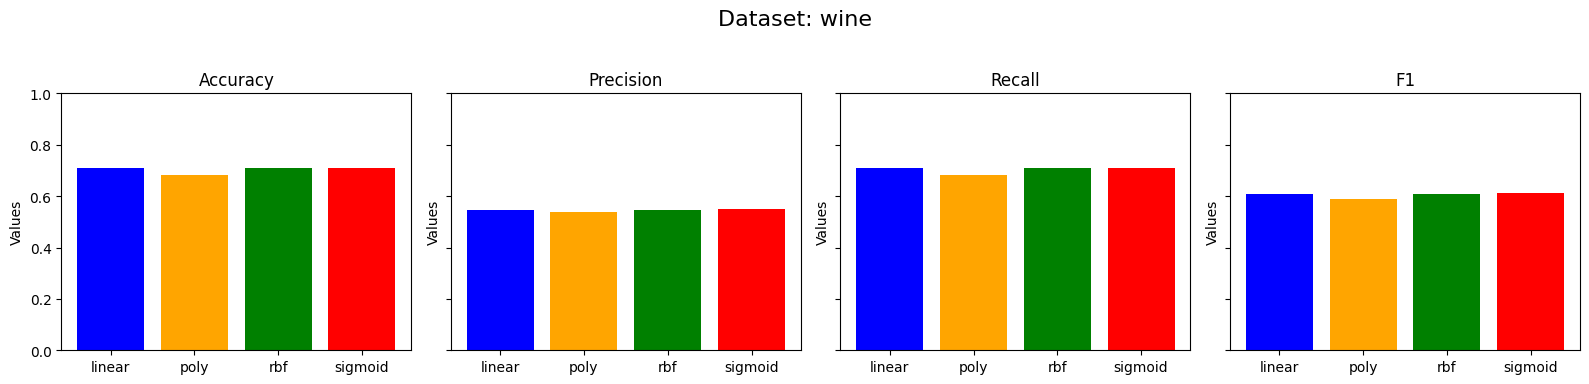

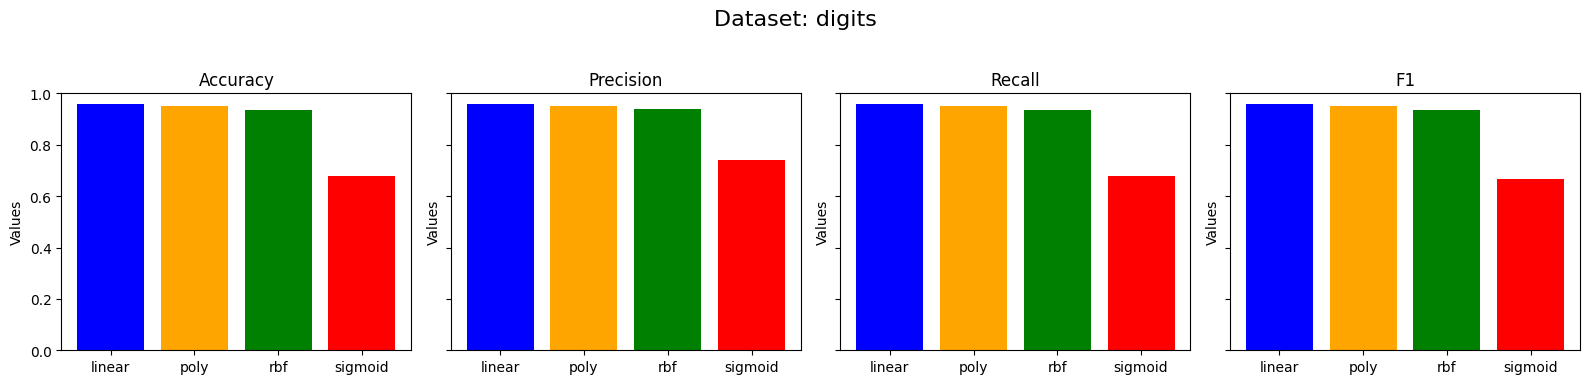

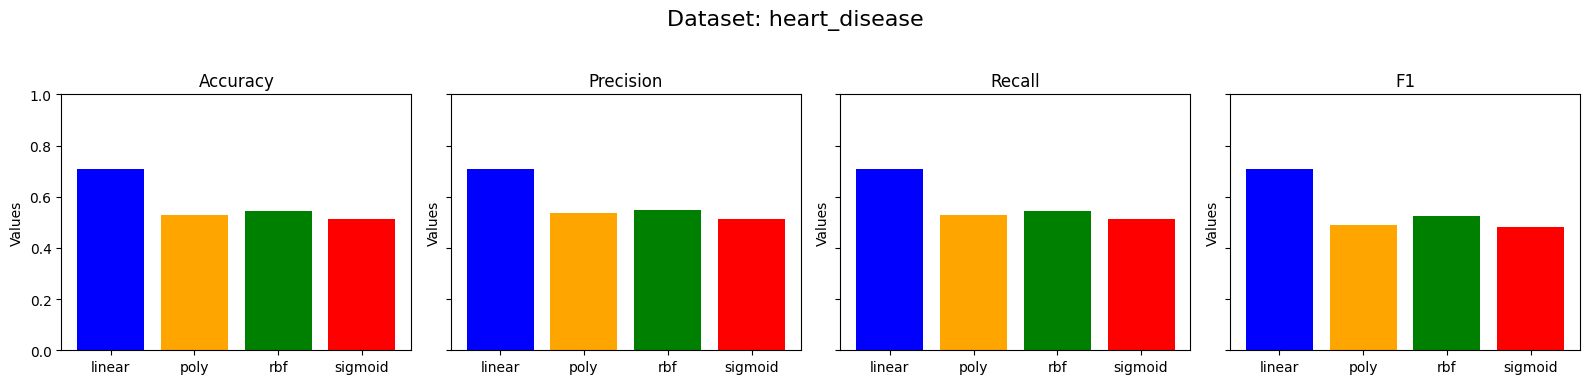

In [92]:
for dataset, kernel_results in results_dict.items():
    # Create separate subplots for each metric
    metrics = list(kernel_results['linear'].keys())  # Assuming all kernels have the same metrics
    num_metrics = len(metrics)
    num_kernels = len(kernel_results)

    fig, axes = plt.subplots(nrows=1, ncols=num_metrics, figsize=(16, 4), sharey=True)
    fig.suptitle(f'Dataset: {dataset}', fontsize=16)

    for i, metric in enumerate(metrics):
        values = [kernel_results[kernel][metric] for kernel in kernel_results]
        axes[i].bar(kernel_results.keys(), values, color=['blue', 'orange', 'green', 'red'])
        axes[i].set_title(metric)
        axes[i].set_ylabel('Values')
        axes[i].set_ylim(0, 1)  # Set y-axis limits to [0, 1]

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplot layout
    plt.show()

In [93]:
for data_set in data_sets:
    if data_set[1] == "heart_disease":
        wn_np = data_set[0].values
        X = wn_np[:, :-1]
        y = wn_np[:, -1]
    else:
        data = data_set[0]()
        X = data.data
        y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    kernel_results = {}
    # List of kernels
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    for kernel in kernels:
        estimator = SVC(probability=True, kernel=kernel)
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store results in the kernel_results dictionary
        kernel_results[kernel] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        }

    # Store the results for this dataset in the main results dictionary
    results_dict[data_set[1]] = kernel_results


In [94]:
for dataset, kernel_results in results_dict.items():
    print(f'\nDataset: {dataset}')
    for kernel, metrics in kernel_results.items():
        print(f'\nKernel: {kernel}')
        print(f'Accuracy: {metrics["Accuracy"]}')
        print(f'Precision: {metrics["Precision"]}')
        print(f'Recall: {metrics["Recall"]}')
        print(f'F1: {metrics["F1"]}')


Dataset: breast_cancer

Kernel: linear
Accuracy: 0.9605263157894737
Precision: 0.9604514216473133
Recall: 0.9605263157894737
F1: 0.9604686387208732

Kernel: poly
Accuracy: 0.9429824561403509
Precision: 0.9459244227604834
Recall: 0.9429824561403509
F1: 0.9418992686446895

Kernel: rbf
Accuracy: 0.9429824561403509
Precision: 0.9459244227604834
Recall: 0.9429824561403509
F1: 0.9418992686446895

Kernel: sigmoid
Accuracy: 0.4342105263157895
Precision: 0.41820079039439456
Recall: 0.4342105263157895
F1: 0.4256969641561291

Dataset: iris

Kernel: linear
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0

Kernel: poly
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0

Kernel: rbf
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0

Kernel: sigmoid
Accuracy: 0.3
Precision: 0.09
Recall: 0.3
F1: 0.13846153846153844

Dataset: wine

Kernel: linear
Accuracy: 0.9444444444444444
Precision: 0.9518518518518518
Recall: 0.9444444444444444
F1: 0.9442063492063492

Kernel: poly
Accuracy: 0.6805555555555556
Precisio

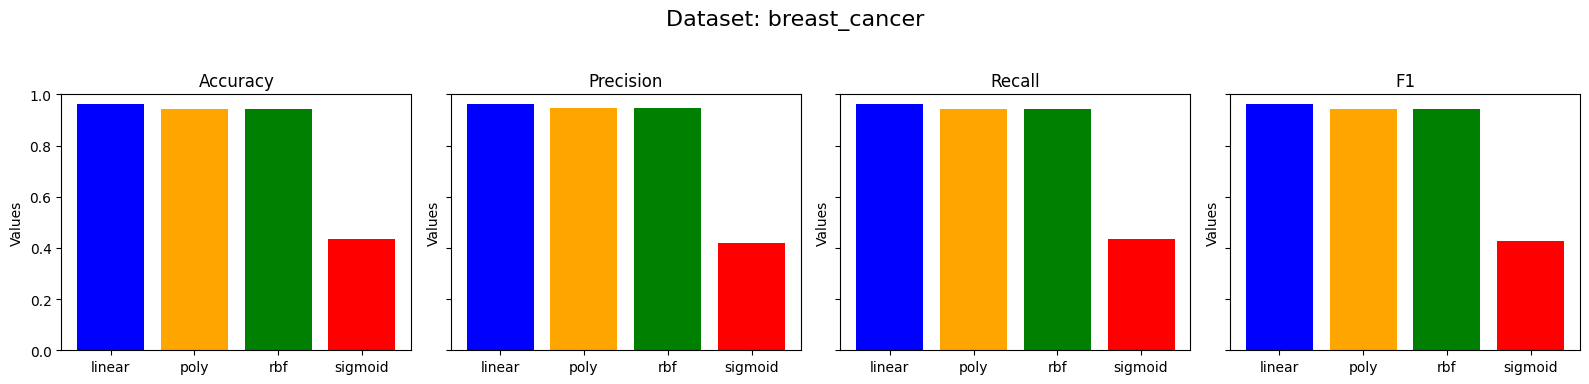

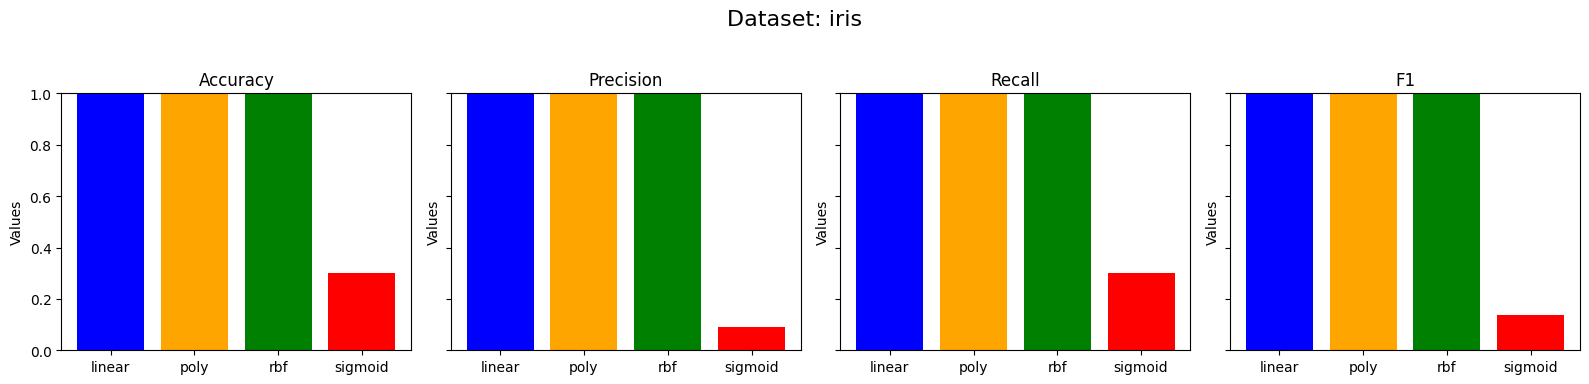

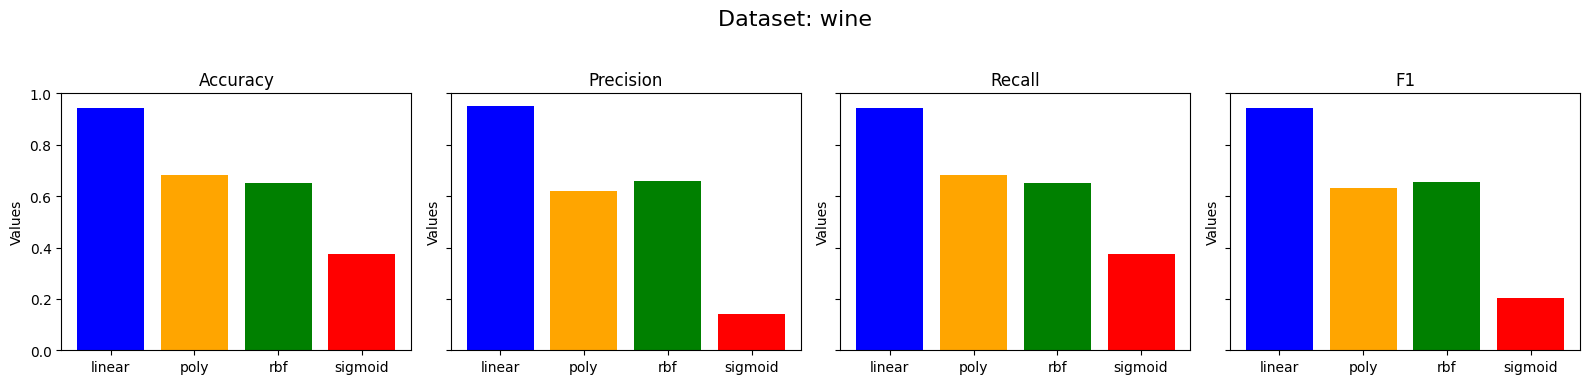

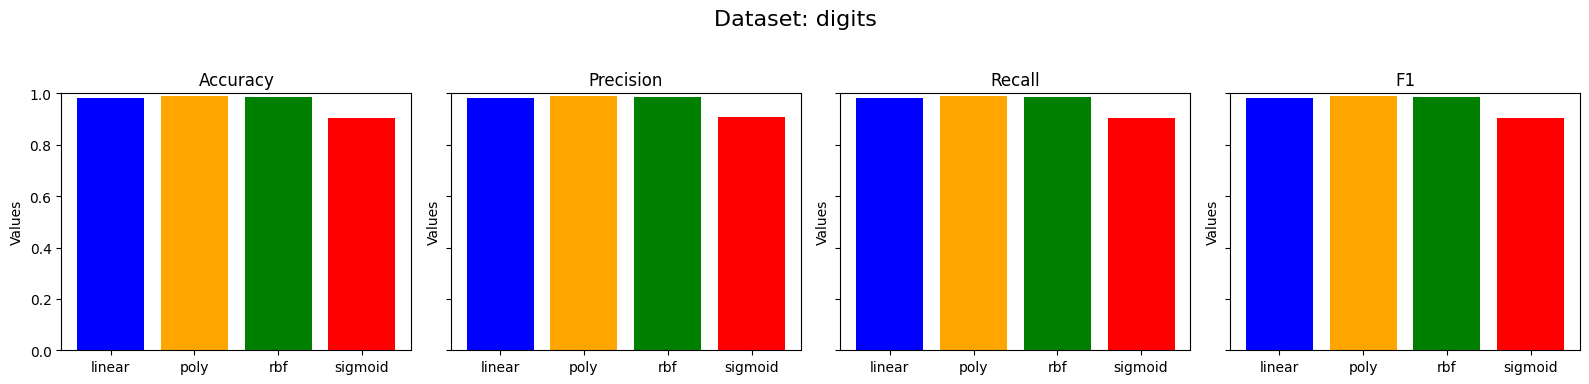

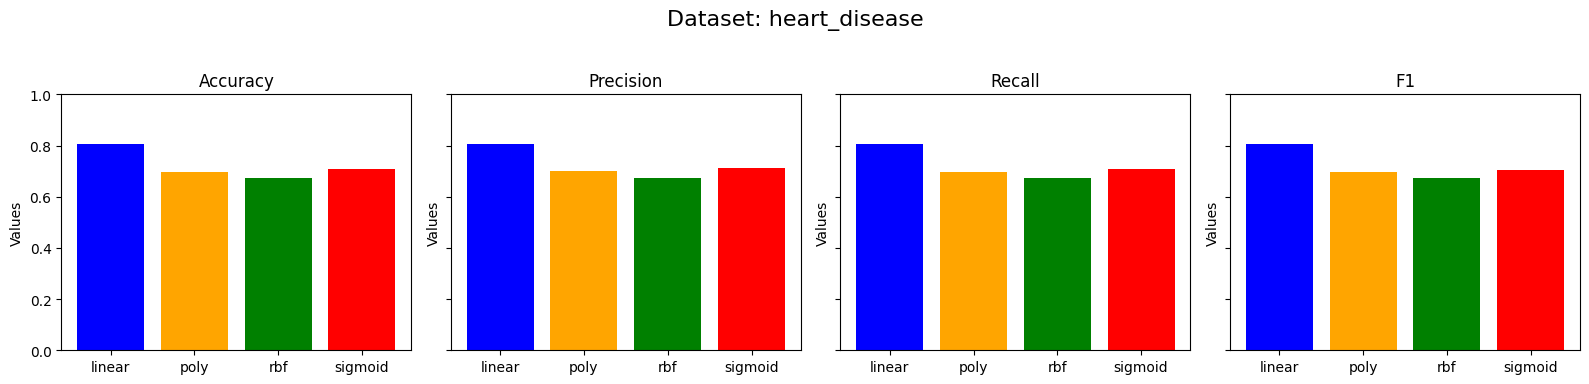

In [95]:
for dataset, kernel_results in results_dict.items():
    # Create separate subplots for each metric
    metrics = list(kernel_results['linear'].keys())  # Assuming all kernels have the same metrics
    num_metrics = len(metrics)
    num_kernels = len(kernel_results)

    fig, axes = plt.subplots(nrows=1, ncols=num_metrics, figsize=(16, 4), sharey=True)
    fig.suptitle(f'Dataset: {dataset}', fontsize=16)

    for i, metric in enumerate(metrics):
        values = [kernel_results[kernel][metric] for kernel in kernel_results]
        axes[i].bar(kernel_results.keys(), values, color=['blue', 'orange', 'green', 'red'])
        axes[i].set_title(metric)
        axes[i].set_ylabel('Values')
        axes[i].set_ylim(0, 1)  # Set y-axis limits to [0, 1]

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplot layout
    plt.show()